# Step by Step Guide on Detecting and Removing Outliers

## 1. Load Dataset

In [1]:
import os
import pandas as pd

In [2]:
os.listdir()

['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 'detect_and_remove_outliers.ipynb',
 'images',
 'LICENSE',
 'playground-series-s3e6',
 'README.md']

In [3]:
data = pd.read_csv ('playground-series-s3e6/train.csv')

In [4]:
data

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0,5594137.1
22726,22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7,6594705.0
22727,22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0,9321511.4
22728,22728,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0,6584708.2


## 2. Check Descriptive Statistics

In [5]:
data[['squareMeters', 'basement']].describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,22730.0,46586.218302,49521.244701,89.0,20392.75,44484.0,71547.0,6071330.0
basement,22730.0,5283.646634,3047.084412,4.0,2977.25,5359.0,7746.0,91992.0


## 3. Visualize Data Distribution 

In [6]:
import matplotlib.pyplot as plt

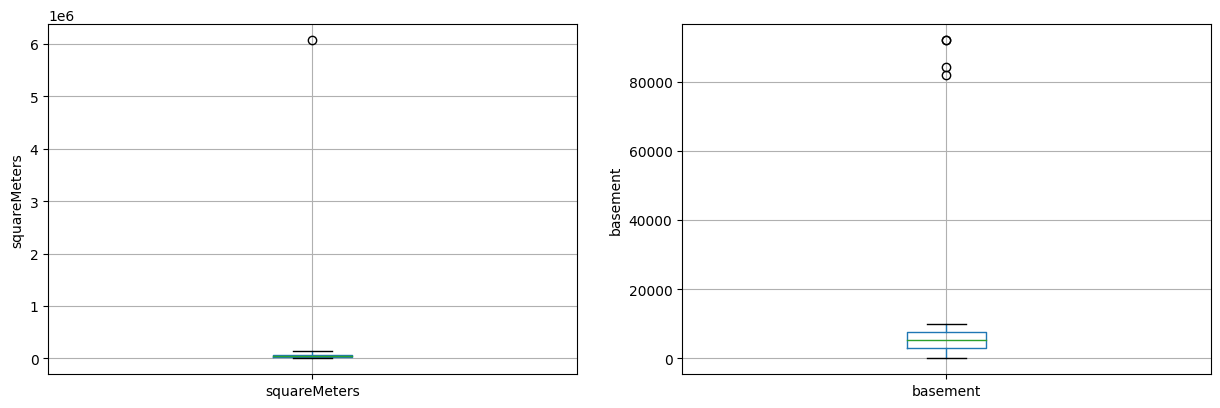

In [7]:
# Boxplots to visualize outliers
outlier_columns = ['squareMeters', 'basement']

def plot_outliers(outlier_columns):
    plt.figure(figsize=(15,10))
    
    for idx, column in enumerate(outlier_columns):
        plt.subplot(2, 2, idx+1)
        fig = data.boxplot(column=column)
        fig.set_ylabel(column)
        

plot_outliers(outlier_columns)

## 4. Removing Outliers 

Tukey’s (1977) technique is used to detect outliers in skewed or non bell-shaped data since it makes no distributional assumptions. However, Tukey’s method may not be appropriate for a small sample size. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal.

Procedure:

Find the first quartile, Q1.
Find the third quartile, Q3.
Calculate the IQR. IQR = Q3-Q1.
Define the normal data range with lower limit as Q1–1.5 IQR and upper limit as Q3+1.5 IQR.

In [8]:
def fix_outlier(column):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    Lower_fence = data[column].quantile(0.25) - (IQR * 3)
    Upper_fence = data[column].quantile(0.75) + (IQR * 3)
    print('{column_name} outliers are values < {lowerboundary} or > {upperboundary}'.format(column_name=column, lowerboundary=Lower_fence, upperboundary=Upper_fence))
    return data[data[column] <= Upper_fence]

In [9]:
for column in outlier_columns:
    data = fix_outlier(column)

squareMeters outliers are values < -133070.0 or > 225009.75
basement outliers are values < -11330.0 or > 22053.0


In [10]:
# Confirm removal
data[['squareMeters', 'basement']].describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,22725.0,46320.073443,29247.649869,89.0,20392.0,44484.0,71541.0,146181.0
basement,22725.0,5269.120924,2844.630983,4.0,2976.0,5359.0,7745.0,10000.0
